In [1]:
#!pip install torch_snippets torch_summary

In [51]:
import torch
from torch import nn, optim
from torchvision import transforms, models
from torch_snippets import *
from torch.utils.data import DataLoader, Dataset
from torchsummary import summary 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import cv2
from glob import glob
import pandas as pd

sns.set_theme()
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [52]:
TRAIN_DIR="./Human Action Recognition/train"
TRAIN_VAL_DF = "./Human Action Recognition/Training_set.csv"

In [53]:
train_val_data=glob(TRAIN_DIR+'/*.jpg')

train_data, val_data = train_test_split(train_val_data, test_size=0.15,
                                       shuffle=True)
print('Train Size', len(train_data))
print('Val Size', len(val_data))


Train Size 10710
Val Size 1890


In [54]:
df=pd.read_csv(TRAIN_VAL_DF)
df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [55]:
df['label'].value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

In [56]:
ind2cat = sorted(df['label'].unique().tolist())
cat2ind = {cat: ind for ind, cat in enumerate(ind2cat)}

In [57]:
cat2ind

{'calling': 0,
 'clapping': 1,
 'cycling': 2,
 'dancing': 3,
 'drinking': 4,
 'eating': 5,
 'fighting': 6,
 'hugging': 7,
 'laughing': 8,
 'listening_to_music': 9,
 'running': 10,
 'sitting': 11,
 'sleeping': 12,
 'texting': 13,
 'using_laptop': 14}

In [58]:
unique_categories=df['label'].nunique()

print('Unique Categories',unique_categories)

Unique Categories 15


In [59]:
df['filename']=df['filename'].apply(lambda x: str.lower(x))

df.head()

,filename,label
0,image_1.jpg,sitting
1,image_2.jpg,using_laptop
2,image_3.jpg,hugging
3,image_4.jpg,sleeping
4,image_5.jpg,using_laptop


In [60]:
class HumanActionData(Dataset):
    def __init__(self, file_paths, df_path, cat2ind):
        super().__init__()
        self.file_paths = file_paths
        self.cat2ind=cat2ind
        self.df = pd.read_csv(df_path)
        self.transform = transforms.Compose([ 
            transforms.Resize([224, 244]), 
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), 
                                 (0.229*255, 0.224*255, 0.225*255))]
        )
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, ind):
        file_path = self.file_paths[ind]
        #print(file_path)
        #itarget = int(fname(file_path)[33:])
        #target = self.df.iloc[itarget-1]['label']
        target = df[df['filename']==str.lower(file_path[33:])]['label'].values[0]
        target = self.cat2ind[target]
        img = Image.open(file_path).convert('RGB')
        return img, target
    
    def collate_fn(self, data):
        imgs, targets = zip(*data)
        imgs = torch.stack([self.transform(img) for img in imgs], 0)
        imgs = imgs.to(device)
        targets = torch.tensor(targets).long().to(device)
        return imgs, targets
    
    def choose(self):
        index=np.random.randint(len(self))
        print(index)
        return self[index]


In [61]:
ft='./Human Action Recognition/train\Image_8629.jpg'
ft[33:]

'Image_8629.jpg'

In [85]:
cat2ind.keys()

dict_keys(['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop'])

In [62]:
train_ds = HumanActionData(train_data, TRAIN_VAL_DF, cat2ind)
train_dl = DataLoader(train_ds, batch_size=128, shuffle=True,
                      collate_fn=train_ds.collate_fn,
                      drop_last=True)

val_ds = HumanActionData(val_data, TRAIN_VAL_DF, cat2ind)
val_dl = DataLoader(val_ds, batch_size=128, shuffle=True,
                    collate_fn=val_ds.collate_fn,
                    drop_last=True)


In [63]:
train_ds.file_paths[10601][33:]

'Image_731.jpg'

In [64]:
img,t=train_ds.__getitem__(5)

print(t)

13


In [65]:
df[df['filename']=='image_11760.jpg']['label'].values[0]

'fighting'

In [66]:
train_ds.file_paths[0]

'./Human Action Recognition/train\\Image_8080.jpg'

In [67]:
'./Human Action Recognition/train\\Image_10169(1).jpg'

'./Human Action Recognition/train\\Image_10169(1).jpg'

In [68]:
train_ds.file_paths.remove('./Human Action Recognition/train\\Image_10169(1).jpg')


ValueError: list.remove(x): x not in list

In [70]:
for f in train_ds.file_paths:
    print(f)
    target = df[df['filename']==str.lower(f[33:])]['label'].values[0]
    target = cat2ind[target]
    print(target)

./Human Action Recognition/train\Image_8080.jpg
2
./Human Action Recognition/train\Image_10345.jpg
5
./Human Action Recognition/train\Image_2927.jpg
6
./Human Action Recognition/train\Image_3936.jpg
4
./Human Action Recognition/train\Image_10601.jpg
5
./Human Action Recognition/train\Image_2973.jpg
13
./Human Action Recognition/train\Image_12258.jpg
10
./Human Action Recognition/train\Image_3578.jpg
6
./Human Action Recognition/train\Image_11797.jpg
10
./Human Action Recognition/train\Image_5924.jpg
9
./Human Action Recognition/train\Image_533.jpg
14
./Human Action Recognition/train\Image_5064.jpg
7
./Human Action Recognition/train\Image_391.jpg
0
./Human Action Recognition/train\Image_8620.jpg
1
./Human Action Recognition/train\Image_6142.jpg
5
./Human Action Recognition/train\Image_6325.jpg
1
./Human Action Recognition/train\Image_4184.jpg
1
./Human Action Recognition/train\Image_6699.jpg
6
./Human Action Recognition/train\Image_7209.jpg
6
./Human Action Recognition/train\Image_10256

In [71]:
train_ds.file_paths[0]



'./Human Action Recognition/train\\Image_8080.jpg'

7458


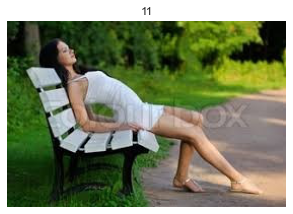

In [72]:
img, target = train_ds.choose()

show(img, title=target)

In [73]:
## Model

In [74]:

class ActionRecognitionClassifier(nn.Module):
    def __init__(self, ntargets):
        super().__init__()
        resnet = models.resnet18(pretrained=True, progress=True)
        modules = list(resnet.children())[:-1] # delete last layer
        self.resnet = nn.Sequential(*modules)
        for param in self.resnet.parameters():
            param.requires_grad = False
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(resnet.fc.in_features),
            nn.Dropout(0.2),
            nn.Linear(resnet.fc.in_features, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, ntargets)
        )
    
    def forward(self, x):
        x = self.resnet(x)
        x = self.fc(x)
        return x


In [75]:
classifier = ActionRecognitionClassifier(unique_categories)
_ = summary(classifier, torch.zeros(32,3,224,224).to(device))

C:\Users\vivek\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 1, 1]           --
|    └─Conv2d: 2-1                       [-1, 64, 112, 112]        (9,408)
|    └─BatchNorm2d: 2-2                  [-1, 64, 112, 112]        (128)
|    └─ReLU: 2-3                         [-1, 64, 112, 112]        --
|    └─MaxPool2d: 2-4                    [-1, 64, 56, 56]          --
|    └─Sequential: 2-5                   [-1, 64, 56, 56]          --
|    |    └─BasicBlock: 3-1              [-1, 64, 56, 56]          (73,984)
|    |    └─BasicBlock: 3-2              [-1, 64, 56, 56]          (73,984)
|    └─Sequential: 2-6                   [-1, 128, 28, 28]         --
|    |    └─BasicBlock: 3-3              [-1, 128, 28, 28]         (230,144)
|    |    └─BasicBlock: 3-4              [-1, 128, 28, 28]         (295,424)
|    └─Sequential: 2-7                   [-1, 256, 14, 14]         --
|    |    └─BasicBlock: 3-5              [-1, 256, 

In [76]:
## Train

In [77]:
def train(data, classifier, optimizer, loss_fn):
    classifier.train()
    imgs, targets = data
    outputs = classifier(imgs)
    loss = loss_fn(outputs, targets)
    preds = outputs.argmax(-1)
    acc = (sum(preds==targets) / len(targets))
    classifier.zero_grad()
    loss.backward()
    optimizer.step()
    return loss, acc


In [78]:
def validate(data, classifier, loss_fn):
    classifier.eval()
    imgs, targets = data
    outputs = classifier(imgs)
    loss = loss_fn(outputs, targets)
    preds = outputs.argmax(-1)
    acc = (sum(preds==targets) / len(targets))
    return loss, acc


In [79]:
n_epochs = 10
#log = Report(n_epochs)

classifier = ActionRecognitionClassifier(len(ind2cat)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(classifier.parameters(),lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10,\
                                      gamma=0.5)


In [80]:
# for i, data in enumerate(train_dl):
#     print(i)

In [81]:
n_batch = len(val_dl)
print(n_batch)

14


In [82]:
for epoch in range(n_epochs):
    n_batch = len(train_dl)
    print(n_batch)
    for i, data in enumerate(train_dl):
        train_loss, train_acc = train(data, classifier, 
                                      optimizer, loss_fn)
        pos = epoch + ((i+1)/n_batch)
        # log.record(pos=pos, train_loss=train_loss, 
        #            train_acc=train_acc, end='\r')
        
    n_batch = len(val_dl)
    print(n_batch)
    for i, data in enumerate(val_dl):
        val_loss, val_acc = validate(data, classifier, loss_fn)
        pos = epoch + ((i+1)/n_batch)
        # log.record(pos=pos, val_loss=val_loss, val_acc=val_acc, 
        #            end='\r')
    scheduler.step()
    print("Epoch",epoch,"Completed")
    #log.report_avgs(epoch+1)

83
14
Epoch 0 Completed
83
14
Epoch 1 Completed
83
14
Epoch 2 Completed
83
14
Epoch 3 Completed
83
14
Epoch 4 Completed
83
14
Epoch 5 Completed
83
14
Epoch 6 Completed
83
14
Epoch 7 Completed
83
14
Epoch 8 Completed
83
14
Epoch 9 Completed


In [83]:
!mkdir saved_model
torch.save(classifier.state_dict(), './saved_model/classifier_weights.pth')

In [84]:
# model = torch.load('./saved_model/classifier_weights.pth', map_location='cpu')
# model.eval()

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'